🎯 Objective

Tujuan dari proyek ini adalah membangun model prediksi yang dapat menilai kemungkinan seorang karyawan akan mengundurkan diri (attrition) dari perusahaannya berdasarkan berbagai faktor personal, pekerjaan, dan kepuasan kerja. Dengan menganalisis fitur-fitur dalam dataset, seperti tingkat kepuasan kerja, frekuensi lembur, pendapatan bulanan, jarak tempat tinggal ke kantor, hingga hubungan dengan atasan, model ini diharapkan dapat secara akurat memprediksi risiko attrition. Hasil prediksi ini nantinya dapat dimanfaatkan oleh tim HR untuk melakukan intervensi dini dan menyusun strategi retensi karyawan yang lebih efektif.


📚 Background

Attrition atau pengunduran diri karyawan merupakan salah satu tantangan utama dalam manajemen sumber daya manusia, terutama dalam industri yang kompetitif. Tingginya tingkat attrition dapat menyebabkan kerugian signifikan bagi perusahaan, baik dari sisi biaya rekrutmen dan pelatihan, maupun hilangnya produktivitas serta pengetahuan institusional. Beberapa faktor yang diyakini berkontribusi terhadap keputusan karyawan untuk resign antara lain beban kerja berlebih, ketidakpuasan terhadap pekerjaan, kurangnya pengakuan atau peluang pengembangan, serta faktor personal seperti lokasi tempat tinggal dan kondisi keluarga.

Dataset HR Analytics menyediakan informasi komprehensif mengenai profil karyawan, kondisi pekerjaan, serta persepsi mereka terhadap lingkungan kerja. Variabel-variabel seperti OverTime, JobSatisfaction, MonthlyIncome, hingga YearsSinceLastPromotion dapat memberikan sinyal dini terhadap potensi resign. Dengan membangun model machine learning berbasis data ini, kita dapat mengidentifikasi pola-pola yang berkontribusi terhadap attrition dan mendukung pengambilan keputusan strategis dalam manajemen talenta dan retensi karyawan.


## Column name	Description


Age : 	The age of the employee. (Numerical)

Attrition : Whether or not the employee has left the organization. (Categorical)

BusinessTravel : The frequency of business travel for the employee (Categorical)

DailyRate :	The daily rate of pay for the employee. (Numerical)

Department :	The department the employee works in. (Categorical)

DistanceFromHome :	The distance from home in miles for the employee (Numerical)

Education :	The level of education achieved by the employee. (Categorical)

EducationField : The field of study for the employee's education. (Categorical)

EmployeeCount :	The total number of employees in the organization. (Numerical)

EmployeeNumber :	A unique identifier for each employee profile. (Numerical)

EnvironmentSatisfaction :The employee's satisfaction with their work environment. (Categorical)

Gender : The gender of the employee. (Categorical)

HourlyRate	: The hourly rate of pay for the employee. (Numerical)

JobInvolvement	: The level of involvement required for the employee's job. (Categorical)

JobLevel	: The job level of the employee. (Categorical)

JobRole	: The role of the employee in the organization. (Categorical)

JobSatisfaction	: The employee's satisfaction with their job. (Categorical)

MaritalStatus	: The marital status of the employee. (Categorical)

MonthlyIncome :	The monthly income of the employee. (Numerical)

MonthlyRate	: The monthly rate of pay for the employee. (Numerical)

NumCompaniesWorked	: The number of companies the employee has worked for. (Numerical)

Over18	: Whether or not the employee is over 18. (Categorical)

OverTime	: Whether or not the employee works overtime. (Categorical)

PercentSalaryHike :	The percentage of salary hike for the employee. (Numerical)

PerformanceRating	: The performance rating of the employee. (Categorical)

RelationshipSatisfaction	: The employee's satisfaction with their relationships. (Categorical)

StandardHours :	The standard hours of work for the employee. (Numerical)

StockOptionLevel :	The stock option level of the employee. (Numerical)

TotalWorkingYears	: The total number of years the employee has worked. (Numerical)

TrainingTimesLastYear	: The number of times the employee was taken for training in the last year. (Numerical)

WorkLifeBalance :	The employee's perception of their work-life balance. (Categorical)

YearsAtCompany	: The number of years the employee has been with the company. (Numerical)

YearsInCurrentRole	: The number of years the employee has been in their current role. (Numerical)

YearsSinceLastPromotion	: The number of years since the employee's last promotion. (Numerical)

YearsWithCurrManager	: The number of years the employee has been with their current manager. (Numerical)

In [1]:
!pip install xgboost

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    balanced_accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

from sklearn.feature_selection import mutual_info_classif
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')



In [2]:
# Import library yang dibutuhkan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Membaca dataset
data = pd.read_csv('/content/drive/MyDrive/Dibimbing/Day50_PortofolioReview_MonalisaSiahaan/HR_Analytics.csv')

In [3]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
# Melakukan copy data
df = data.copy()

## Premilinary Look and Data Cleansing

### Sample of Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## General Information & Missing Value

In [6]:
# cek missing value
df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [7]:
# cek duplicated value
df.duplicated().sum()

np.int64(0)

## EDA

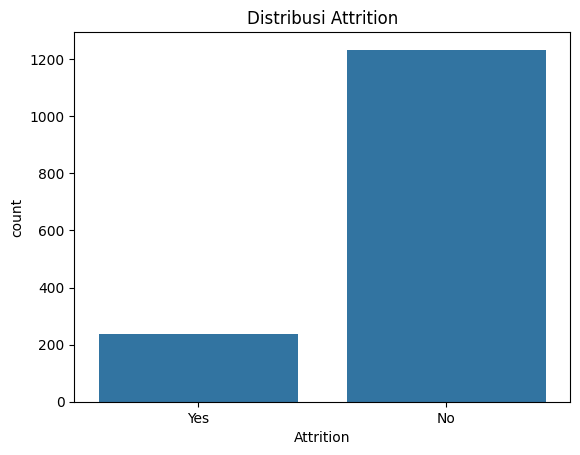

In [8]:
# Cek distribusi target (y)

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Attrition', data=df)
plt.title('Distribusi Attrition')
plt.show()

In [9]:
# Proporsi keseluruhan attrition
attrition_prop = df['Attrition'].value_counts(normalize=True) * 100
print(attrition_prop)

Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


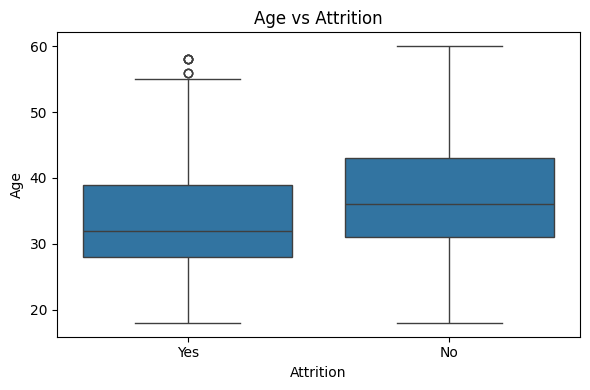

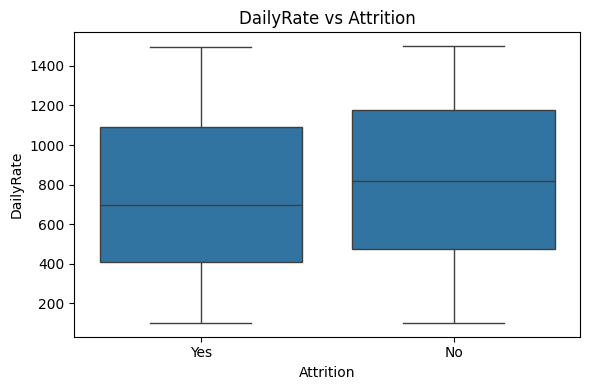

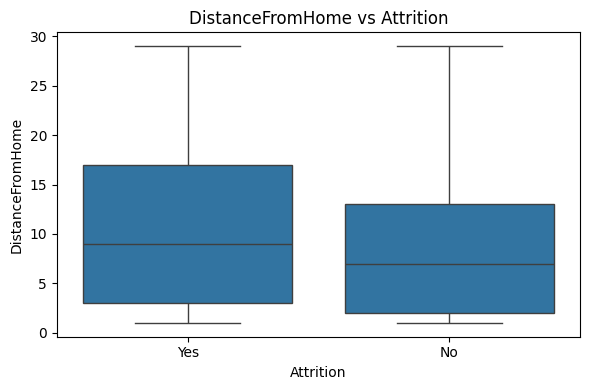

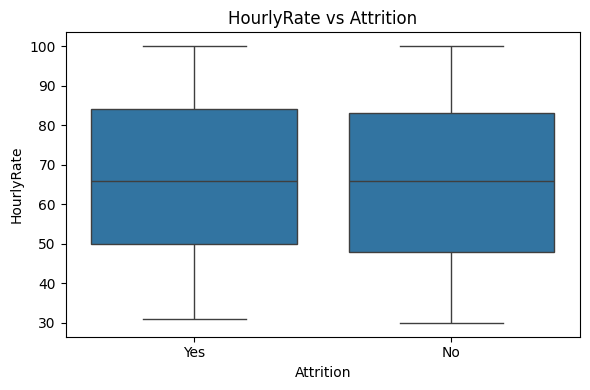

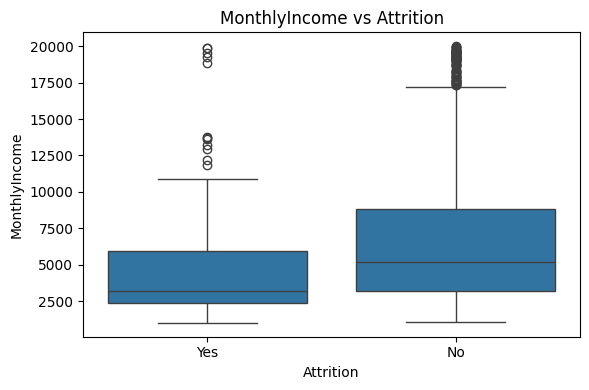

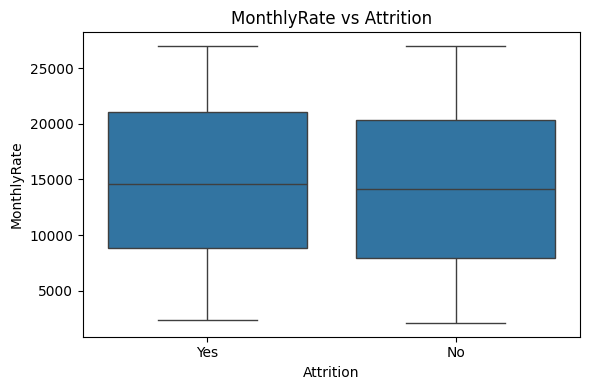

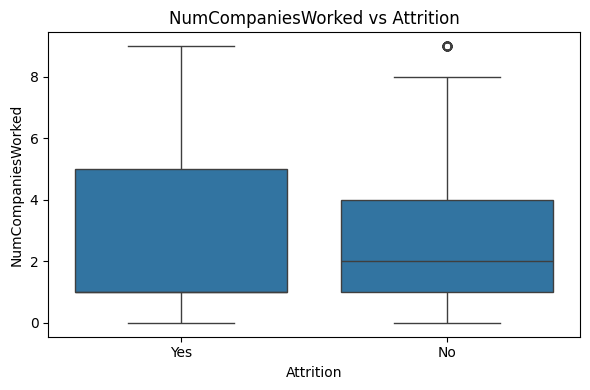

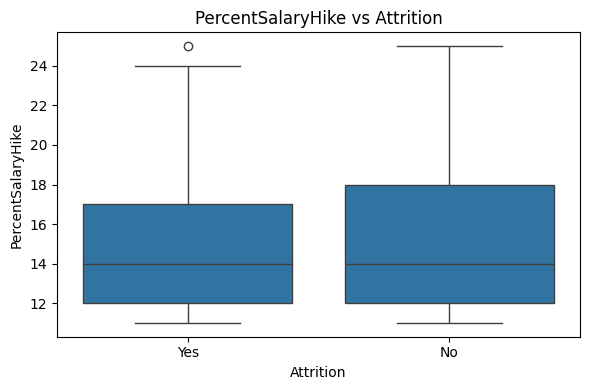

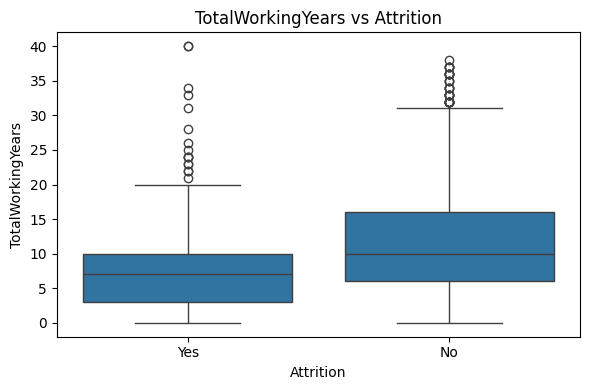

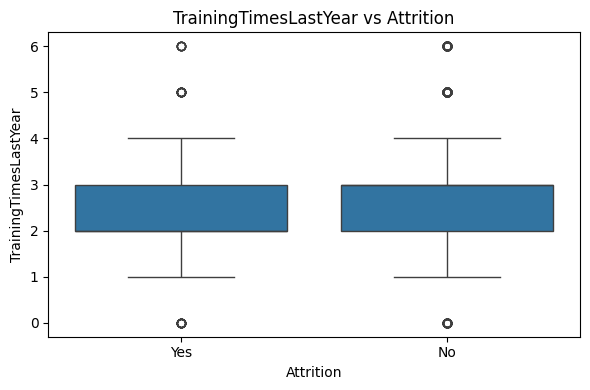

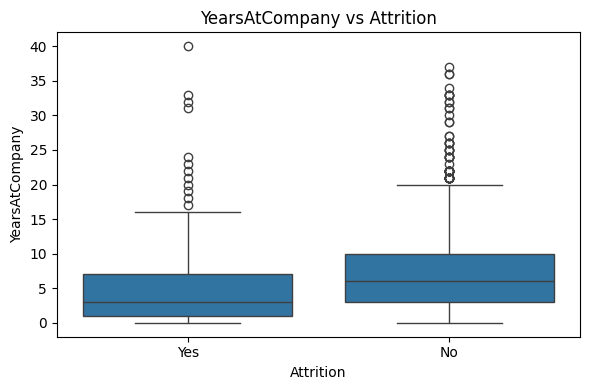

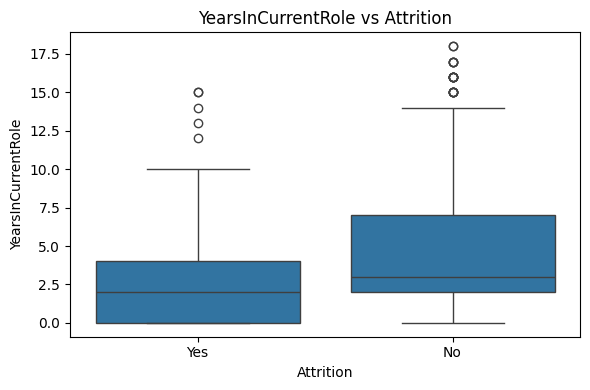

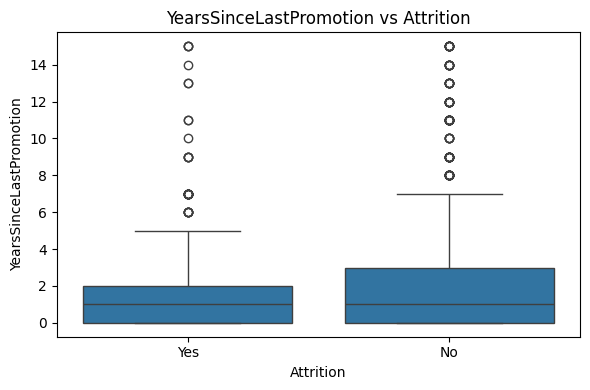

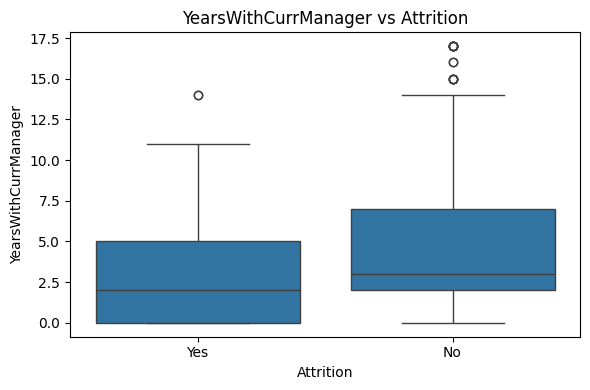

In [10]:
# Visualisasi Fitur Numerik per Attrition

import matplotlib.pyplot as plt
import seaborn as sns

# Daftar kolom numerik yang dianggap relevan
num_cols = [
    'Age',
    'DailyRate',
    'DistanceFromHome',
    'HourlyRate',
    'MonthlyIncome',
    'MonthlyRate',
    'NumCompaniesWorked',
    'PercentSalaryHike',
    'TotalWorkingYears',
    'TrainingTimesLastYear',
    'YearsAtCompany',
    'YearsInCurrentRole',
    'YearsSinceLastPromotion',
    'YearsWithCurrManager'
]

# Visualisasi boxplot
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Attrition', y=col, data=df)
    plt.title(f'{col} vs Attrition')
    plt.tight_layout()
    plt.show()


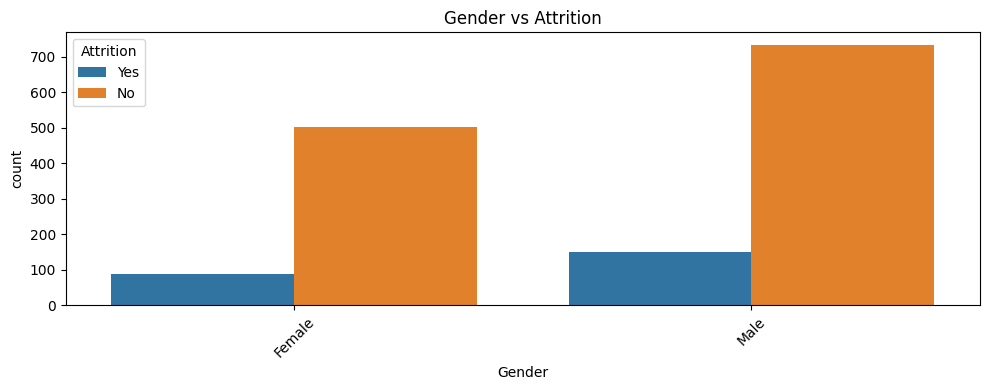

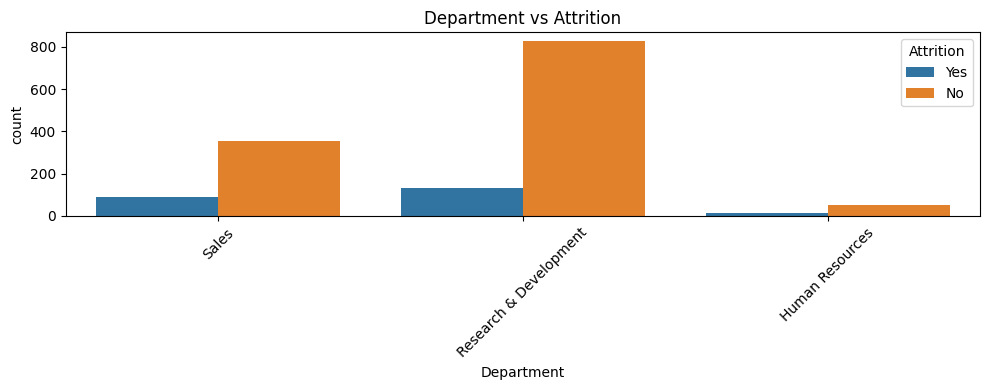

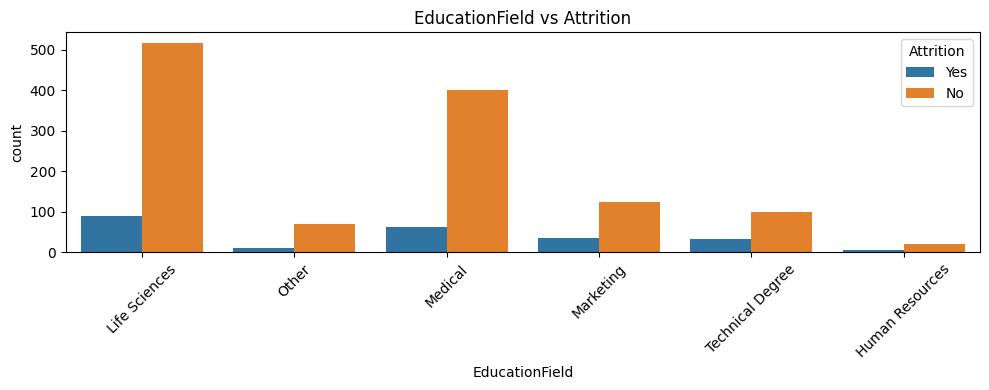

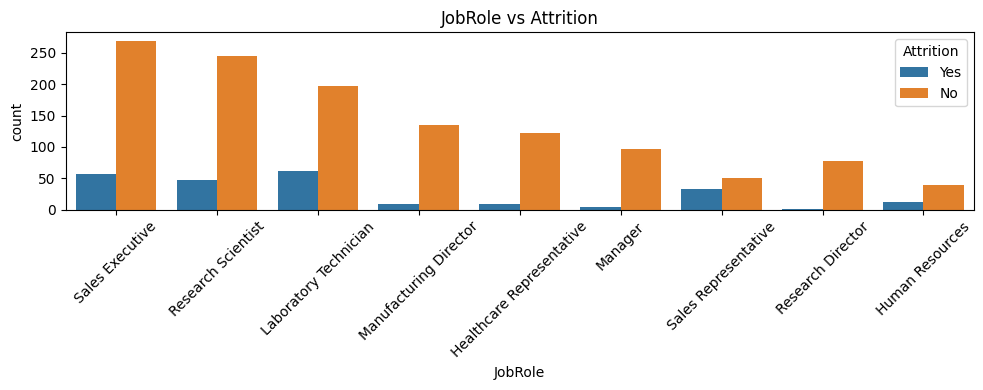

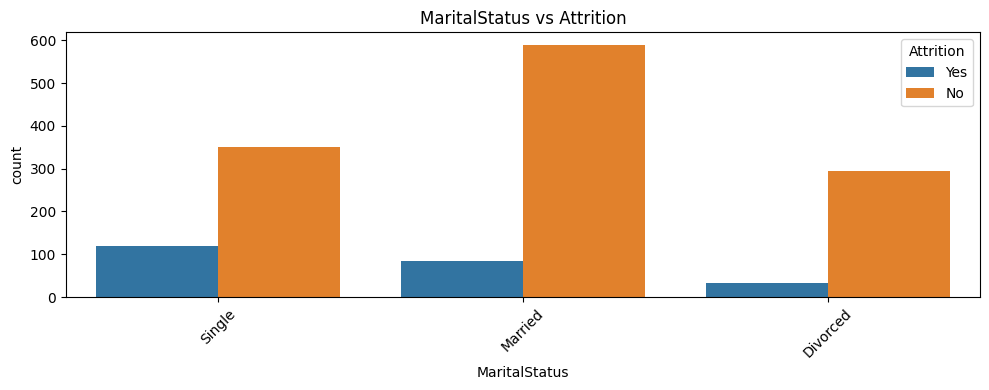

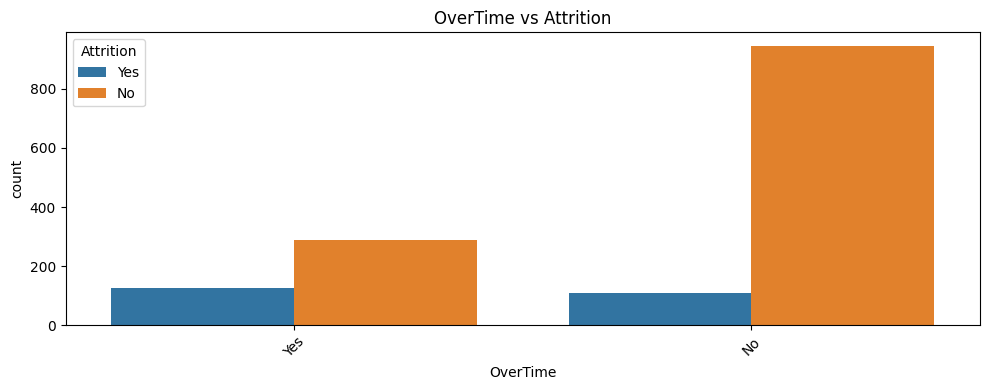

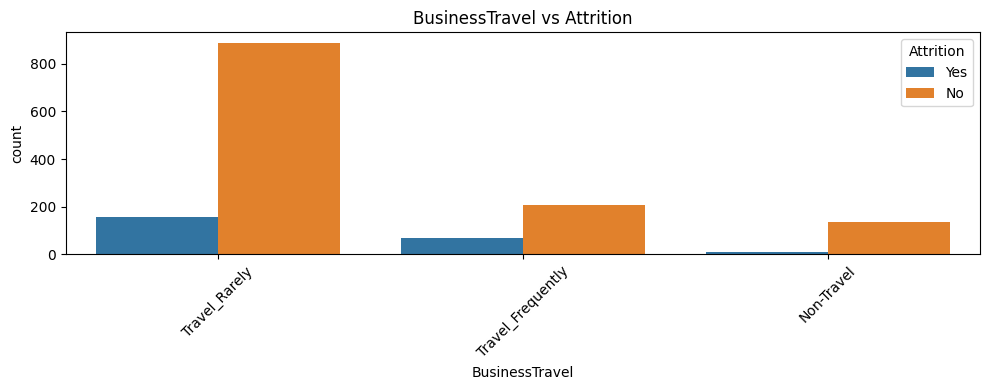

In [11]:
# Visualisasi Fitur Kategorikal

cat_cols = ['Gender', 'Department', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime', 'BusinessTravel']

for col in cat_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, hue='Attrition', data=df)
    plt.title(f'{col} vs Attrition')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Insight
- Gender : 	Pria cenderung lebih banyak resign, tapi masih sejalan dengan populasi pria yang juga lebih besar di dataset.

- Department : Meskipun R&D memiliki jumlah resign terbanyak, proporsi resign tertinggi justru terdapat pada Human Resources dan Sales. Hal ini menunjukkan perlunya perhatian khusus terhadap budaya kerja dan kepuasan karyawan di dua departemen tersebut.

- EducationField : Attrition banyak terjadi pada Life Sciences (karena jumlah total juga besar) dan Medical. Tetapi "Technical Degree", "Human Resources" jumlahnya kecil namun proporsi resign bisa lebih tinggi secara relatif.

- JobRole : Pekerjaan seperti Sales Executive dan Laboratory Technician memiliki jumlah resign yang tinggi. Manufacturing Director dan Healthcare Representative punya attrition yang rendah. Ada hubungan antara jenis pekerjaan dengan tingkat attrition — pekerja teknikal & sales cenderung lebih sering resign.

- MaritalStatus :Single punya jumlah resign tertinggi secara proporsional. Married jumlahnya besar tapi cenderung bertahan.
Divorced cukup stabil, attrition rendah. Status lajang berpotensi jadi indikator kuat attrition — mungkin karena komitmen atau fleksibilitas lebih tinggi untuk berpindah kerja.

- Overtime : Karyawan yang bekerja lembur (Yes) memiliki tingkat attrition yang jauh lebih tinggi dibanding yang tidak lembur. Meski jumlah pekerja lembur lebih sedikit, namun banyak di antaranya yang resign. OverTime adalah indikator kuat terhadap risiko resign — ini bisa jadi tanda stres kerja atau workload tinggi.

## Preprocessing

### Drop kolom tidak relevan

In [12]:
# Drop kolom tidak relevan
df = df.drop(columns=['EmployeeNumber', 'Over18', 'EmployeeCount', 'StandardHours'])


- Kolom EmployeeCount, StandardHours, dan Over18 dihapus  karena memiliki nilai konstan di seluruh dataset sehingga kemungkinan tidak memberikan kontribusi terhadap proses prediksi.

- Kolom EmployeeNumber juga dihapus karena merupakan ID unik yang tidak memiliki nilai informatif dalam analisis.

In [14]:
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0


### Encoding


In [15]:
# Ubah target 'Attrition' menjadi 1/0
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Kolom kategorikal untuk di-label encoding
cat_cols = ['Gender', 'Department', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime', 'BusinessTravel']


# Label Encoding untuk semua kolom kategorikal
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [16]:
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int64
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int64
 14  JobSatisfaction           1470 non-null 

## Feature Selection (Mutual info & korelasi)

Text(0.5, 1.0, 'Top Mutual Information Features with Attrition')

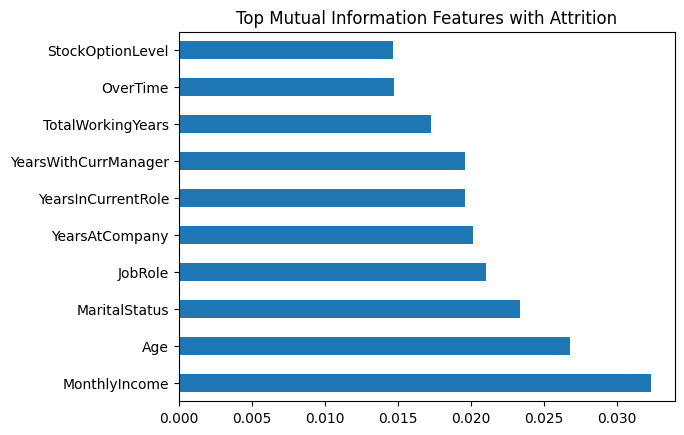

In [18]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

mi = mutual_info_classif(X, y)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)
mi_series.head(10).plot(kind='barh')
plt.title("Top Mutual Information Features with Attrition")


## Train - Test Split + Scaling

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Modeling Train

### Baseline Modeling

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# === 1. Random Forest ===
rf_base = RandomForestClassifier(random_state=42)
rf_base.fit(X_train_scaled, y_train)
rf_pred = rf_base.predict(X_test_scaled)
rf_proba = rf_base.predict_proba(X_test_scaled)[:, 1]

print("=== Random Forest Baseline ===")
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))
print("ROC AUC:", roc_auc_score(y_test, rf_proba))
print("\n")

# === 2. XGBoost ===
xgb_base = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_base.fit(X_train_scaled, y_train)
xgb_pred = xgb_base.predict(X_test_scaled)
xgb_proba = xgb_base.predict_proba(X_test_scaled)[:, 1]

print("=== XGBoost Baseline ===")
print(confusion_matrix(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))
print("ROC AUC:", roc_auc_score(y_test, xgb_proba))
print("\n")

# === 3. Logistic Regression ===
lr_base = LogisticRegression(solver='liblinear', random_state=42)
lr_base.fit(X_train_scaled, y_train)
lr_pred = lr_base.predict(X_test_scaled)
lr_proba = lr_base.predict_proba(X_test_scaled)[:, 1]

print("=== Logistic Regression Baseline ===")
print(confusion_matrix(y_test, lr_pred))
print(classification_report(y_test, lr_pred))
print("ROC AUC:", roc_auc_score(y_test, lr_proba))


=== Random Forest Baseline ===
[[241   6]
 [ 41   6]]
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       247
           1       0.50      0.13      0.20        47

    accuracy                           0.84       294
   macro avg       0.68      0.55      0.56       294
weighted avg       0.80      0.84      0.80       294

ROC AUC: 0.792747006632785


=== XGBoost Baseline ===
[[239   8]
 [ 37  10]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.91       247
           1       0.56      0.21      0.31        47

    accuracy                           0.85       294
   macro avg       0.71      0.59      0.61       294
weighted avg       0.82      0.85      0.82       294

ROC AUC: 0.7580325609440951


=== Logistic Regression Baseline ===
[[239   8]
 [ 29  18]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       247
           1    

### Evaluasi Model (Baseline Performance)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"=== {model_name} ===")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba):.4f}")
    print("-" * 40)


In [23]:
print("### BASELINE MODELS (TANPA SMOTE) ###\n")

evaluate_model(rf_base, X_test_scaled, y_test, "Random Forest - Baseline")
evaluate_model(xgb_base, X_test_scaled, y_test, "XGBoost - Baseline")
evaluate_model(lr_base, X_test_scaled, y_test, "Logistic Regression - Baseline")


### BASELINE MODELS (TANPA SMOTE) ###

=== Random Forest - Baseline ===
Confusion Matrix:
[[241   6]
 [ 41   6]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       247
           1       0.50      0.13      0.20        47

    accuracy                           0.84       294
   macro avg       0.68      0.55      0.56       294
weighted avg       0.80      0.84      0.80       294

ROC AUC Score: 0.7927
----------------------------------------
=== XGBoost - Baseline ===
Confusion Matrix:
[[239   8]
 [ 37  10]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.91       247
           1       0.56      0.21      0.31        47

    accuracy                           0.85       294
   macro avg       0.71      0.59      0.61       294
weighted avg       0.82      0.85      0.82       294

ROC AUC Score: 0.7580
--------------------------------

### Handling Imbalance Data (Smote)

In [24]:
from imblearn.over_sampling import SMOTE

# Terapkan SMOTE ke training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

# Cek distribusi kelas setelah SMOTE
from collections import Counter
print("Distribusi setelah SMOTE:", Counter(y_train_res))


Distribusi setelah SMOTE: Counter({0: 986, 1: 986})


## Hyperparameter Tuning

In [25]:
## Random Forest Tuning

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_clf = RandomForestClassifier(random_state=42)
rf_random = RandomizedSearchCV(estimator=rf_clf, param_distributions=rf_params,
                               n_iter=20, cv=5, scoring='f1', verbose=1, random_state=42, n_jobs=-1)

rf_random.fit(X_train_res, y_train_res)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='f1', verbose=1)

In [31]:
## XGBoost Tuning

from xgboost import XGBClassifier

xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_random = RandomizedSearchCV(estimator=xgb_clf, param_distributions=xgb_params,
                                n_iter=20, cv=5, scoring='f1', verbose=1, random_state=42, n_jobs=-1)

xgb_random.fit(X_train_res, y_train_res)



Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_cons...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 6, 10],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.7, 0.8, 1.0]},
                   random_state=42, scoring='f1', verbose=1)

In [32]:
## Logistic Regression Tuning
from sklearn.linear_model import LogisticRegression

lr_params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

lr_clf = LogisticRegression(random_state=42)
lr_random = RandomizedSearchCV(estimator=lr_clf, param_distributions=lr_params,
                               n_iter=8, cv=5, scoring='f1', verbose=1, random_state=42, n_jobs=-1)

lr_random.fit(X_train_res, y_train_res)



Fitting 5 folds for each of 8 candidates, totalling 40 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
                   n_iter=8, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear']},
                   random_state=42, scoring='f1', verbose=1)

### Evaluasi Model Setelah Tuning

In [33]:
# Fungsi evaluasi
def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"=== {model_name} ===")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba):.4f}")
    print("-" * 40)


In [34]:
# Evaluasi hasil tuning
evaluate_model(rf_random.best_estimator_, X_test_scaled, y_test, "Random Forest - Tuned")
evaluate_model(xgb_random.best_estimator_, X_test_scaled, y_test, "XGBoost - Tuned")
evaluate_model(lr_random.best_estimator_, X_test_scaled, y_test, "Logistic Regression - Tuned")


=== Random Forest - Tuned ===
Confusion Matrix:
[[236  11]
 [ 34  13]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       247
           1       0.54      0.28      0.37        47

    accuracy                           0.85       294
   macro avg       0.71      0.62      0.64       294
weighted avg       0.82      0.85      0.83       294

ROC AUC Score: 0.7998
----------------------------------------
=== XGBoost - Tuned ===
Confusion Matrix:
[[235  12]
 [ 34  13]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       247
           1       0.52      0.28      0.36        47

    accuracy                           0.84       294
   macro avg       0.70      0.61      0.64       294
weighted avg       0.82      0.84      0.82       294

ROC AUC Score: 0.8111
----------------------------------------
=== Logistic Regression - Tuned ===


In [36]:
def evaluate_train_test(model, X_train, y_train, X_test, y_test, model_name="Model"):
    from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

    # Evaluasi di training set
    y_train_pred = model.predict(X_train)
    y_train_proba = model.predict_proba(X_train)[:, 1]
    print(f"=== {model_name} - TRAIN SET ===")
    print("Confusion Matrix:")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    print(f"ROC AUC (train): {roc_auc_score(y_train, y_train_proba):.4f}")
    print("-" * 40)

    # Evaluasi di testing set
    y_test_pred = model.predict(X_test)
    y_test_proba = model.predict_proba(X_test)[:, 1]
    print(f"=== {model_name} - TEST SET ===")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_test_pred))
    print(classification_report(y_test, y_test_pred))
    print(f"ROC AUC (test): {roc_auc_score(y_test, y_test_proba):.4f}")
    print("=" * 60)

# Jalankan untuk ketiga model:
evaluate_train_test(rf_random.best_estimator_, X_train_res, y_train_res, X_test_scaled, y_test, "Random Forest - Tuned")
evaluate_train_test(xgb_random.best_estimator_, X_train_res, y_train_res, X_test_scaled, y_test, "XGBoost - Tuned")
evaluate_train_test(lr_random.best_estimator_, X_train_res, y_train_res, X_test_scaled, y_test, "Logistic Regression - Tuned")


=== Random Forest - Tuned - TRAIN SET ===
Confusion Matrix:
[[986   0]
 [  0 986]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       986
           1       1.00      1.00      1.00       986

    accuracy                           1.00      1972
   macro avg       1.00      1.00      1.00      1972
weighted avg       1.00      1.00      1.00      1972

ROC AUC (train): 1.0000
----------------------------------------
=== Random Forest - Tuned - TEST SET ===
Confusion Matrix:
[[236  11]
 [ 34  13]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       247
           1       0.54      0.28      0.37        47

    accuracy                           0.85       294
   macro avg       0.71      0.62      0.64       294
weighted avg       0.82      0.85      0.83       294

ROC AUC (test): 0.7998
=== XGBoost - Tuned - TRAIN SET ===
Confusion Matrix:
[[986   0]
 [  9 977]]
              pr

### Feature Importance

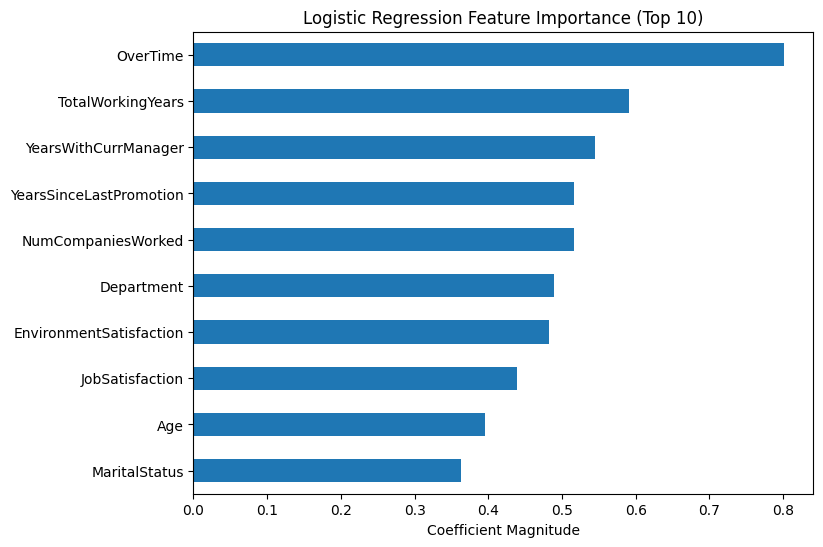

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

#  model Logistic Regression adalah model etrbaik
model = lr_random.best_estimator_

# Ambil koefisien dan nama fitur (pastikan X_train.columns sesuai dengan data asli)
coefficients = pd.Series(model.coef_[0], index=X_train.columns)

# Urutkan berdasarkan nilai absolut koefisien (magnitude)
importances_lr = coefficients.abs().sort_values(ascending=False)

# Plot top 10 fitur terpenting
importances_lr.head(10).plot(kind='barh', figsize=(8,6))
plt.title("Logistic Regression Feature Importance (Top 10)")
plt.xlabel("Coefficient Magnitude")
plt.gca().invert_yaxis()
plt.show()



## Push Github

In [39]:
# Ganti dengan email dan username GitHub kamu
!git config --global user.email "monalisasiahaan06@gmail.com"
!git config --global user.name "monalisa0603"


In [40]:
# Clone repository GitHub ke Colab
!git clone https://github.com/monalisa0603/Employee-Attrition-Analysis.git


Cloning into 'Employee-Attrition-Analysis'...


In [42]:
%cd Employee-Attrition-Analysis



/content/Employee-Attrition-Analysis


In [48]:
!cp /content/Day50_PortofolioReview_MonalisaSiahaan.ipynb /content/Employee-Attrition-Analysis/



cp: cannot stat '/content/Day50_PortofolioReview_MonalisaSiahaan.ipynb': No such file or directory


cp: missing destination file operand after '/content/Employee-Attrition-Analysis/'
Try 'cp --help' for more information.


In [50]:
!cp "Day50_PortofolioReview_MonalisaSiahaan.ipynb" /content/Employee-Attrition-Analysis/


cp: cannot stat 'Day50_PortofolioReview_MonalisaSiahaan.ipynb': No such file or directory


In [51]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
!find /content/drive/ -name "Day50_PortofolioReview_MonalisaSiahaan.ipynb"


/content/drive/MyDrive/Dibimbing/Day50_PortofolioReview_MonalisaSiahaan/Day50_PortofolioReview_MonalisaSiahaan.ipynb
